# Adult Incomes - UCI

Analysis of the UCI Adult Incomes classification dataset.

In [1]:
%pylab inline
pylab.style.use('ggplot')
import pandas as pd
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Getting the Data

In [3]:
train_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
train_df = pd.read_csv(train_url, header=None)

In [4]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Attribute Information

    age: continuous.
    workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    fnlwgt: continuous.
    education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    education-num: continuous.
    marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    sex: Female, Male.
    capital-gain: continuous.
    capital-loss: continuous.
    hours-per-week: continuous.
    native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [5]:
train_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                   'marital_status', 'occupation', 'relationship', 'race', 'sex',
                   'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income_band']

In [6]:
train_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_band
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Check for Missing Data

In [7]:
train_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income_band       object
dtype: object

In [8]:
# Remove excess whitespace from strings
nn_cols = train_df.dtypes[train_df.dtypes == np.object].index

for c in nn_cols:
    train_df.loc[:, c] = train_df.loc[:, c].str.strip()

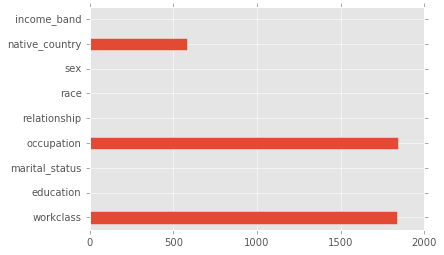

In [9]:
# Missing values per column
train_df.loc[:, nn_cols].isin(['?']).sum(axis=0).plot(kind='barh')

In [10]:
# Drop rows with missing data
n_missing_per_row = train_df.loc[:, nn_cols].isin(['?']).sum(axis=1)
train_df_full = train_df.loc[n_missing_per_row.isin([0]), :]

In [11]:
train_df_full.isin(['?']).sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_band       0
dtype: int64

# Check for Class Imbalance

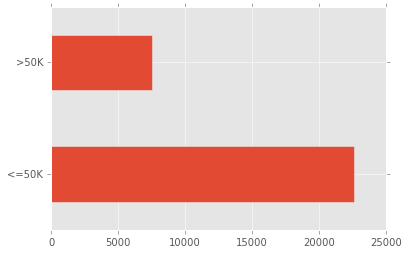

In [12]:
train_df_full.income_band.value_counts().plot(kind='barh')

# Bivariate Analysis

## Numeric Features

In [13]:
train_df_full.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income_band       object
dtype: object

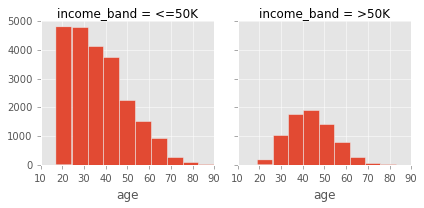

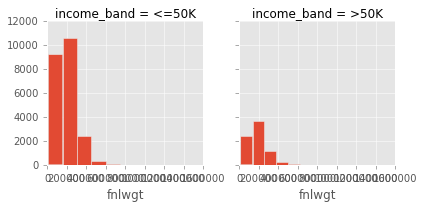

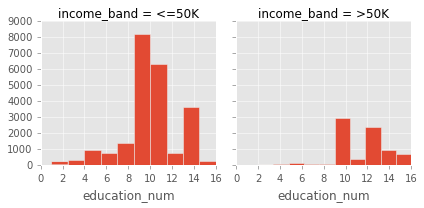

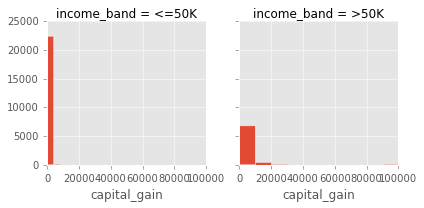

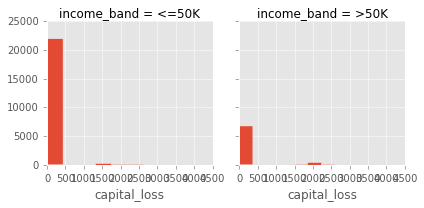

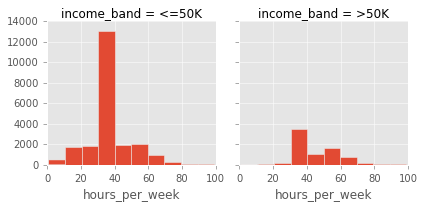

In [14]:
num_cols = train_df_full.dtypes[train_df_full.dtypes == np.int64].index

for n_col in num_cols:
    g_col = sns.FacetGrid(col='income_band', data=train_df_full)
    g_col = g_col.map(pylab.hist, n_col)

## Bivariate Features

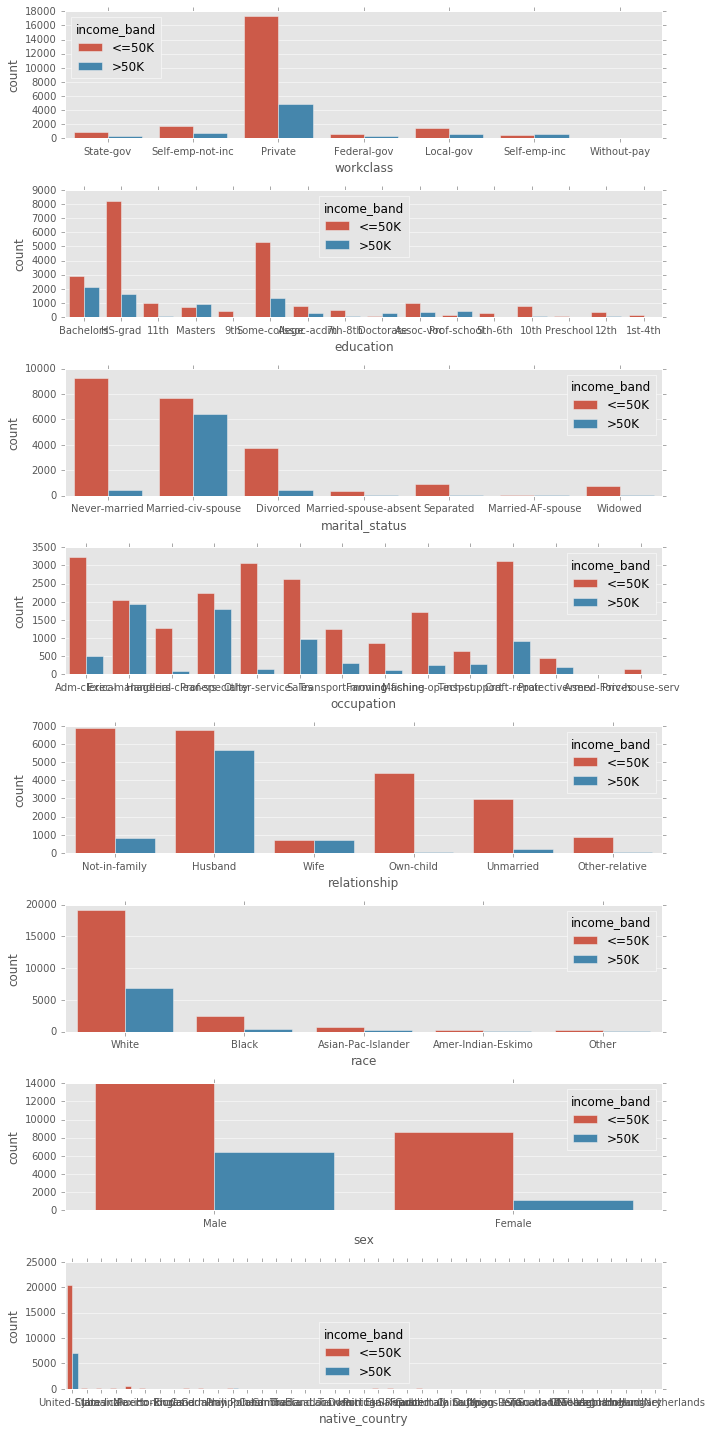

In [15]:
obj_cols = train_df_full.dtypes[train_df_full.dtypes == np.object].index

_, axes = pylab.subplots(len(obj_cols)-1, 1, figsize=(10, 20))

for i, colname in enumerate(obj_cols.drop('income_band')):
    sns.countplot(x=train_df_full[colname], 
                  hue=train_df_full.income_band, 
                  ax=axes[i]
                 )
    
pylab.tight_layout()

# Feature Correlations

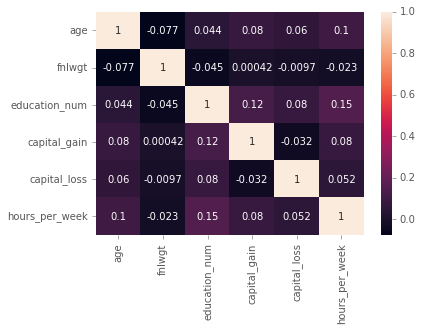

In [16]:
num_cols = train_df_full.dtypes[train_df_full.dtypes == np.int64].index

num_features = train_df_full.loc[:, num_cols]
f_corrs = num_features.corr()

sns.heatmap(f_corrs, annot=True)

# Modeling

## Baseline

We want our machine learning model to do better than classifying everything as the major class. 

In [26]:
n_samples = train_df_full.shape[0]
label_counts = train_df_full.income_band.value_counts()
label_counts

<=50K    22654
>50K      7508
Name: income_band, dtype: int64

So assuming our naive baseline model predicts the income band for all samples as '<=50K':

In [31]:
accuracy = label_counts['<=50K'] / label_counts.sum()
accuracy

0.75107751475366358

In [36]:
precision = label_counts['<=50K'] / label_counts.sum() # precision = TP / (TP + FP)
recall = 1.0 # recall = TP/(TP + FN), here FN=0
f1_score = (2.0 * precision * recall) / (precision + recall)
f1_score

0.85784610724023025

In [35]:
from sklearn.metrics import classification_report

scores = pd.Series(index=train_df_full.index, data='<=50K')
print(classification_report(train_df_full.income_band, scores))

             precision    recall  f1-score   support

      <=50K       0.75      1.00      0.86     22654
       >50K       0.00      0.00      0.00      7508

avg / total       0.56      0.75      0.64     30162



d:\Anaconda3\envs\latest\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## SVM with Only the Numerical Features

Next, we iteratively build an SVM, first on the numerical features and then the categorical features.

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from IPython.display import display

In [68]:
def cross_validation_score(features, labels, C=1000, scoring='f1_macro'):
    """
    Build an SVM with the Radial Basis Kernel and return cross-validation scores.
    
    Use a `BaggingClassifier` to construct an ensemble of SVMs on a subset of samples for all features. This speeds up the 
    training phase considerably, and also acts as a regularizer.
    """
    base = SVC(C=C, kernel='rbf')
    model = BaggingClassifier(base_estimator=base, n_estimators=20, max_samples=0.05)
    prep = StandardScaler()
    estimator = make_pipeline(prep, model)
    
    scores = cross_val_score(estimator=estimator, 
                             X=features, 
                             y=labels, 
                             cv=10,
                             verbose=10,
                            scoring=scoring)

    scores = pd.Series(scores)
    return scores

[CV]  ................................................................
[CV] ................................. , score=0.697848, total=  46.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   46.9s remaining:    0.0s


[CV] ................................. , score=0.700353, total=  55.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s


[CV] ................................. , score=0.702018, total=  48.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.5min remaining:    0.0s


[CV] ................................. , score=0.709784, total=  47.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.3min remaining:    0.0s


[CV] ................................. , score=0.691489, total=  49.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.1min remaining:    0.0s


[CV] ................................. , score=0.707278, total=  45.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  4.9min remaining:    0.0s


[CV] ................................. , score=0.688040, total=  47.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  5.7min remaining:    0.0s


[CV] ................................. , score=0.722436, total=  51.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  6.5min remaining:    0.0s


[CV] ................................. , score=0.714710, total=  53.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  7.4min remaining:    0.0s


[CV] ................................. , score=0.717223, total=  50.1s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  8.3min finished


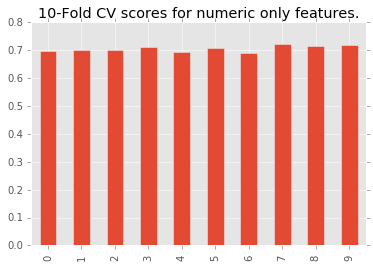

In [25]:
num_only_scores = cross_validation_score(
    features=num_features, 
    labels=train_df_full.income_band)

num_only_scores.plot(kind='bar', 
                     title='10-Fold CV scores for numeric only features.')

In [33]:
num_only_scores.mean()

0.7051179246753663

# SVM with One-Hot Encoded Features

In [37]:
from sklearn.preprocessing import MultiLabelBinarizer

def encode_one_hot(source, target, feature_name):
    """
    One-hot encode categorical feature `feature_name` in `source` DataFrame, and append it to `target`.
    """
    labels = sorted(pd.unique(source.loc[:, feature_name]))
    encoder = MultiLabelBinarizer(classes=labels)
    
    raw = np.atleast_2d(train_df_full.loc[:, feature_name].values).T
    encoded_df = pd.DataFrame(index=source.index, data=encoder.fit_transform(raw))
    encoded_df.columns = [feature_name + '_' + str(c) for c in encoded_df.columns]
    
    return pd.concat([target, encoded_df], axis=1)

In [39]:
numeric_plus_occupation = encode_one_hot(train_df_full, num_features, 'occupation')

[CV]  ................................................................
[CV] ................................. , score=0.701795, total=  20.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.3s remaining:    0.0s


[CV] ................................. , score=0.707776, total=  19.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   40.2s remaining:    0.0s


[CV] ................................. , score=0.708123, total=  20.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min remaining:    0.0s


[CV] ................................. , score=0.708687, total=  18.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s


[CV] ................................. , score=0.718072, total=  18.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min remaining:    0.0s


[CV] ................................. , score=0.701730, total=  19.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.0min remaining:    0.0s


[CV] ................................. , score=0.699243, total=  19.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.3min remaining:    0.0s


[CV] ................................. , score=0.725242, total=  19.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.6min remaining:    0.0s


[CV] ................................. , score=0.719062, total=  18.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.9min remaining:    0.0s


[CV] ................................. , score=0.711408, total=  19.9s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.3min finished


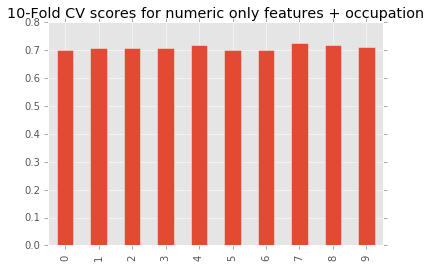

In [43]:
numeric_plus_occupation_scores = cross_validation_score(
    features=numeric_plus_occupation, 
    labels=train_df_full.income_band)

numeric_plus_occupation_scores.plot(kind='bar', 
                     title='10-Fold CV scores for numeric only features + occupation')

In [44]:
numeric_plus_occupation_scores.mean()

0.7101138379212603

## Binarize sex

[CV]  ................................................................
[CV] ................................. , score=0.720386, total=  17.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.1s remaining:    0.0s


[CV] ................................. , score=0.729845, total=  17.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   34.5s remaining:    0.0s


[CV] ................................. , score=0.735157, total=  17.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   51.8s remaining:    0.0s


[CV] ................................. , score=0.721216, total=  17.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.2min remaining:    0.0s


[CV] ................................. , score=0.736852, total=  16.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min remaining:    0.0s


[CV] ................................. , score=0.722164, total=  16.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.7min remaining:    0.0s


[CV] ................................. , score=0.713274, total=  17.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.0min remaining:    0.0s


[CV] ................................. , score=0.757632, total=  17.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.3min remaining:    0.0s


[CV] ................................. , score=0.745734, total=  16.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.6min remaining:    0.0s


[CV] ................................. , score=0.740255, total=  17.2s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.9min finished


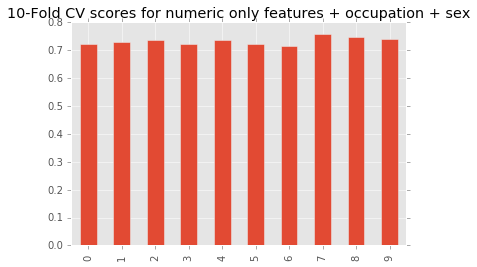

In [46]:
numeric_plus_occupation_plus_sex = numeric_plus_occupation.assign(
    sex=train_df_full.sex.map(lambda s: 0 if s=='Male' else 1))

numeric_plus_occupation_plus_sex_scores = cross_validation_score(
    features=numeric_plus_occupation_plus_sex, 
    labels=train_df_full.income_band)

numeric_plus_occupation_plus_sex_scores.plot(kind='bar', 
                     title='10-Fold CV scores for numeric only features + occupation + sex')

In [48]:
numeric_plus_occupation_plus_sex_scores.mean()

0.7322516126437988

## Binarize Race

[CV]  ................................................................
[CV] ................................. , score=0.719781, total=  14.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.7s remaining:    0.0s


[CV] ................................. , score=0.731385, total=  14.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   29.7s remaining:    0.0s


[CV] ................................. , score=0.727219, total=  15.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   45.6s remaining:    0.0s


[CV] ................................. , score=0.726468, total=  15.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.0min remaining:    0.0s


[CV] ................................. , score=0.744129, total=  14.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min remaining:    0.0s


[CV] ................................. , score=0.730220, total=  15.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.5min remaining:    0.0s


[CV] ................................. , score=0.726585, total=  16.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.8min remaining:    0.0s


[CV] ................................. , score=0.737241, total=  14.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.0min remaining:    0.0s


[CV] ................................. , score=0.736708, total=  17.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.3min remaining:    0.0s


[CV] ................................. , score=0.730055, total=  15.3s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.6min finished


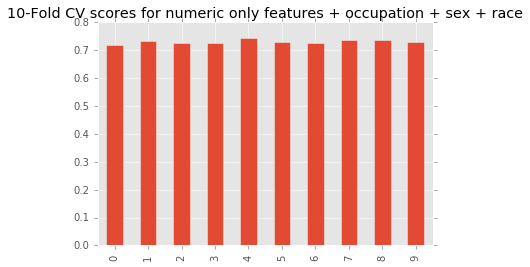

In [50]:
numeric_plus_3 = numeric_plus_occupation_plus_sex.assign(
    race=train_df_full.race.map(lambda s: 0 if s=='White' else 1))

numeric_plus_3_scores = cross_validation_score(
    features=numeric_plus_3, 
    labels=train_df_full.income_band)

numeric_plus_3_scores.plot(kind='bar', 
                     title='10-Fold CV scores for numeric only features + occupation + sex + race')

In [51]:
numeric_plus_3_scores.mean()

0.7309789616836809

## Include Relationship

[CV]  ................................................................
[CV] ................................. , score=0.764204, total=  10.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.0s remaining:    0.0s


[CV] ................................. , score=0.765431, total=  10.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.7s remaining:    0.0s


[CV] ................................. , score=0.767137, total=   9.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   30.6s remaining:    0.0s


[CV] ................................. , score=0.775879, total=  10.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   41.6s remaining:    0.0s


[CV] ................................. , score=0.778906, total=  10.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   52.3s remaining:    0.0s


[CV] ................................. , score=0.765649, total=  10.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.0min remaining:    0.0s


[CV] ................................. , score=0.769295, total=   9.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.2min remaining:    0.0s


[CV] ................................. , score=0.782643, total=  10.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.4min remaining:    0.0s


[CV] ................................. , score=0.775356, total=  10.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.6min remaining:    0.0s


[CV] ................................. , score=0.767722, total=  10.5s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.7min finished


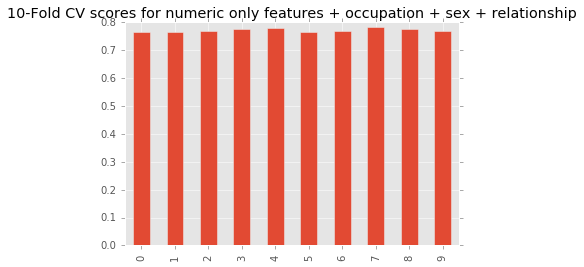

In [52]:
numeric_plus_3 = encode_one_hot(train_df_full, numeric_plus_occupation_plus_sex, 'relationship')

numeric_plus_3_scores = cross_validation_score(
    features=numeric_plus_3, 
    labels=train_df_full.income_band)

numeric_plus_3_scores.plot(kind='bar', 
                     title='10-Fold CV scores for numeric only features + occupation + sex + relationship')

In [53]:
numeric_plus_3_scores.mean()

0.7712220853703391

## Include Workclass

[CV]  ................................................................
[CV] ................................. , score=0.756078, total=   8.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s


[CV] ................................. , score=0.768656, total=   8.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.9s remaining:    0.0s


[CV] ................................. , score=0.772703, total=   8.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   25.3s remaining:    0.0s


[CV] ................................. , score=0.765506, total=   8.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   34.2s remaining:    0.0s


[CV] ................................. , score=0.773347, total=   8.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   42.5s remaining:    0.0s


[CV] ................................. , score=0.771848, total=   8.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   51.3s remaining:    0.0s


[CV] ................................. , score=0.763609, total=   8.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   59.6s remaining:    0.0s


[CV] ................................. , score=0.780635, total=   8.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.1min remaining:    0.0s


[CV] ................................. , score=0.781518, total=   8.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.3min remaining:    0.0s


[CV] ................................. , score=0.768653, total=   8.3s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.4min finished


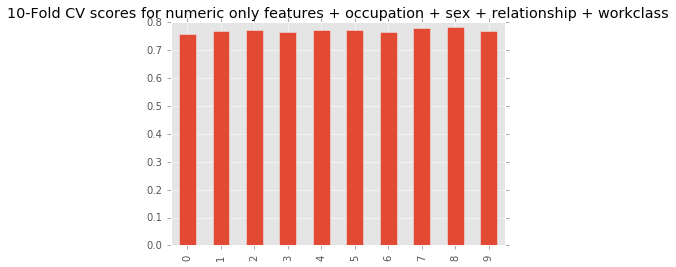

In [56]:
numeric_plus_4 = encode_one_hot(train_df_full, numeric_plus_3, 'workclass')

numeric_plus_4_scores = cross_validation_score(
    features=numeric_plus_4, 
    labels=train_df_full.income_band)

numeric_plus_4_scores.plot(
    kind='bar', 
    title='10-Fold CV scores for numeric only features + occupation + sex + relationship + workclass')

In [57]:
numeric_plus_4_scores.mean()

0.7702552067785874

## Include Marital Status

[CV]  ................................................................
[CV] ................................. , score=0.758010, total=  10.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s


[CV] ................................. , score=0.765991, total=  10.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.7s remaining:    0.0s


[CV] ................................. , score=0.766639, total=  10.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   31.7s remaining:    0.0s


[CV] ................................. , score=0.762089, total=   9.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   41.4s remaining:    0.0s


[CV] ................................. , score=0.772953, total=   9.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   51.4s remaining:    0.0s


[CV] ................................. , score=0.773825, total=  10.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.0min remaining:    0.0s


[CV] ................................. , score=0.767859, total=  10.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.2min remaining:    0.0s


[CV] ................................. , score=0.778850, total=   9.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.4min remaining:    0.0s


[CV] ................................. , score=0.776683, total=   9.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.5min remaining:    0.0s


[CV] ................................. , score=0.758135, total=  10.4s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.7min finished


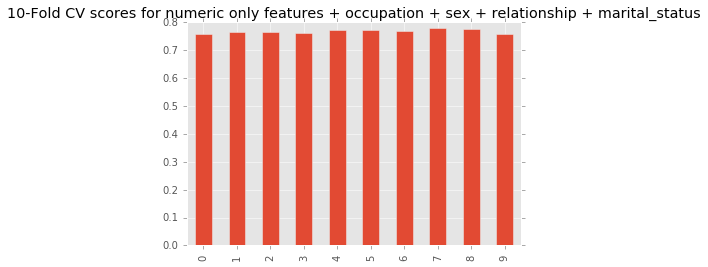

In [58]:
numeric_plus_4 = encode_one_hot(train_df_full, numeric_plus_3, 'marital_status')

numeric_plus_4_scores = cross_validation_score(
    features=numeric_plus_4, 
    labels=train_df_full.income_band)

numeric_plus_4_scores.plot(
    kind='bar', 
    title='10-Fold CV scores for numeric only features + occupation + sex + relationship + marital_status')

In [59]:
numeric_plus_4_scores.mean()

0.7681035231229244

## Include Native Country

[CV]  ................................................................
[CV] ................................. , score=0.755815, total=   9.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.7s remaining:    0.0s


[CV] ................................. , score=0.760139, total=   9.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.7s remaining:    0.0s


[CV] ................................. , score=0.764717, total=   9.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   29.0s remaining:    0.0s


[CV] ................................. , score=0.770679, total=   9.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   38.2s remaining:    0.0s


[CV] ................................. , score=0.768785, total=   9.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   47.4s remaining:    0.0s


[CV] ................................. , score=0.763078, total=  10.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   57.5s remaining:    0.0s


[CV] ................................. , score=0.771400, total=   9.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.1min remaining:    0.0s


[CV] ................................. , score=0.787186, total=   9.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.3min remaining:    0.0s


[CV] ................................. , score=0.786016, total=   9.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.4min remaining:    0.0s


[CV] ................................. , score=0.771984, total=   9.5s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.6min finished


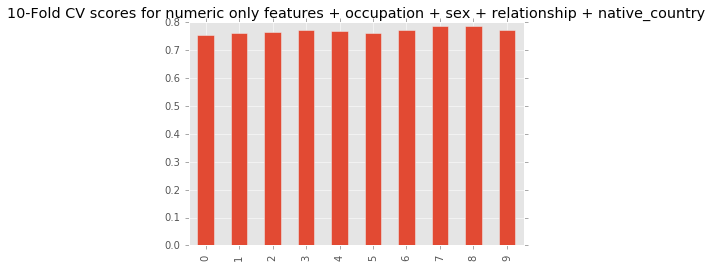

In [61]:
numeric_plus_4 = numeric_plus_3.assign(
    native_country=train_df_full.native_country.map(lambda v: 0.0 if v=='United-States' else 1.0))

numeric_plus_4_scores = cross_validation_score(
    features=numeric_plus_4, 
    labels=train_df_full.income_band)

numeric_plus_4_scores.plot(
    kind='bar', 
    title='10-Fold CV scores for numeric only features + occupation + sex + relationship + native_country')

In [63]:
numeric_plus_4_scores.mean()

0.7699798121433643

## Grid Search for the Best Parameters

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

base = SVC()
model = BaggingClassifier(base_estimator=base, n_estimators=20, max_samples=0.05)
prep = StandardScaler()

estimator = Pipeline([
    ('prep', prep),
    ('model', model),
])

params =  [
  {'model__base_estimator__C': [100, 1000],    
   'model__base_estimator__gamma': [0.1, 0.001]
  },
 ]

grid_search = GridSearchCV(estimator=estimator, param_grid=params, scoring='accuracy', verbose=10, cv=10)
grid_search = grid_search.fit(numeric_plus_3, train_df_full.income_band)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] model__base_estimator__gamma=0.1, model__base_estimator__C=100 ..
[CV]  model__base_estimator__gamma=0.1, model__base_estimator__C=100, score=0.828306, total=   5.4s
[CV] model__base_estimator__gamma=0.1, model__base_estimator__C=100 ..


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.1s remaining:    0.0s


[CV]  model__base_estimator__gamma=0.1, model__base_estimator__C=100, score=0.829301, total=   5.4s
[CV] model__base_estimator__gamma=0.1, model__base_estimator__C=100 ..


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   42.9s remaining:    0.0s


[CV]  model__base_estimator__gamma=0.1, model__base_estimator__C=100, score=0.835267, total=   5.9s
[CV] model__base_estimator__gamma=0.1, model__base_estimator__C=100 ..


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s


[CV]  model__base_estimator__gamma=0.1, model__base_estimator__C=100, score=0.835598, total=   5.5s
[CV] model__base_estimator__gamma=0.1, model__base_estimator__C=100 ..


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.4min remaining:    0.0s


[CV]  model__base_estimator__gamma=0.1, model__base_estimator__C=100, score=0.840849, total=   5.4s
[CV] model__base_estimator__gamma=0.1, model__base_estimator__C=100 ..


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min remaining:    0.0s


[CV]  model__base_estimator__gamma=0.1, model__base_estimator__C=100, score=0.824602, total=   5.4s
[CV] model__base_estimator__gamma=0.1, model__base_estimator__C=100 ..


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.2min remaining:    0.0s


[CV]  model__base_estimator__gamma=0.1, model__base_estimator__C=100, score=0.832891, total=   5.3s
[CV] model__base_estimator__gamma=0.1, model__base_estimator__C=100 ..


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.5min remaining:    0.0s


[CV]  model__base_estimator__gamma=0.1, model__base_estimator__C=100, score=0.845491, total=   5.4s
[CV] model__base_estimator__gamma=0.1, model__base_estimator__C=100 ..


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.9min remaining:    0.0s


[CV]  model__base_estimator__gamma=0.1, model__base_estimator__C=100, score=0.836153, total=   5.5s
[CV] model__base_estimator__gamma=0.1, model__base_estimator__C=100 ..


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.2min remaining:    0.0s


[CV]  model__base_estimator__gamma=0.1, model__base_estimator__C=100, score=0.833499, total=   5.6s
[CV] model__base_estimator__gamma=0.001, model__base_estimator__C=100 
[CV]  model__base_estimator__gamma=0.001, model__base_estimator__C=100, score=0.840902, total=   3.5s
[CV] model__base_estimator__gamma=0.001, model__base_estimator__C=100 
[CV]  model__base_estimator__gamma=0.001, model__base_estimator__C=100, score=0.849188, total=   3.4s
[CV] model__base_estimator__gamma=0.001, model__base_estimator__C=100 
[CV]  model__base_estimator__gamma=0.001, model__base_estimator__C=100, score=0.844879, total=   3.6s
[CV] model__base_estimator__gamma=0.001, model__base_estimator__C=100 
[CV]  model__base_estimator__gamma=0.001, model__base_estimator__C=100, score=0.838913, total=   3.4s
[CV] model__base_estimator__gamma=0.001, model__base_estimator__C=100 
[CV]  model__base_estimator__gamma=0.001, model__base_estimator__C=100, score=0.853448, total=   3.3s
[CV] model__base_estimator__gamma=0

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 13.7min finished


In [78]:
grid_search.best_score_

0.84729129368079037

In [79]:
grid_search.best_params_

{'model__base_estimator__C': 1000, 'model__base_estimator__gamma': 0.001}

In [80]:
params =  [
  {'model__base_estimator__C': [1000, 5000],    
   'model__base_estimator__gamma': [0.001, 0.005]
  },
 ]

grid_search = GridSearchCV(estimator=estimator, param_grid=params, scoring='accuracy', verbose=10, cv=10)
grid_search = grid_search.fit(numeric_plus_3, train_df_full.income_band)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] model__base_estimator__gamma=0.001, model__base_estimator__C=1000 
[CV]  model__base_estimator__gamma=0.001, model__base_estimator__C=1000, score=0.842227, total=   4.4s
[CV] model__base_estimator__gamma=0.001, model__base_estimator__C=1000 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.9s remaining:    0.0s


[CV]  model__base_estimator__gamma=0.001, model__base_estimator__C=1000, score=0.845210, total=   4.3s
[CV] model__base_estimator__gamma=0.001, model__base_estimator__C=1000 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   35.9s remaining:    0.0s


[CV]  model__base_estimator__gamma=0.001, model__base_estimator__C=1000, score=0.844879, total=   4.4s
[CV] model__base_estimator__gamma=0.001, model__base_estimator__C=1000 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   54.3s remaining:    0.0s


[CV]  model__base_estimator__gamma=0.001, model__base_estimator__C=1000, score=0.837918, total=   4.3s
[CV] model__base_estimator__gamma=0.001, model__base_estimator__C=1000 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.2min remaining:    0.0s


[CV]  model__base_estimator__gamma=0.001, model__base_estimator__C=1000, score=0.851127, total=   4.3s
[CV] model__base_estimator__gamma=0.001, model__base_estimator__C=1000 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.5min remaining:    0.0s


[CV]  model__base_estimator__gamma=0.001, model__base_estimator__C=1000, score=0.843501, total=   4.6s
[CV] model__base_estimator__gamma=0.001, model__base_estimator__C=1000 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.8min remaining:    0.0s


[CV]  model__base_estimator__gamma=0.001, model__base_estimator__C=1000, score=0.850133, total=   4.4s
[CV] model__base_estimator__gamma=0.001, model__base_estimator__C=1000 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.1min remaining:    0.0s


[CV]  model__base_estimator__gamma=0.001, model__base_estimator__C=1000, score=0.858753, total=   4.4s
[CV] model__base_estimator__gamma=0.001, model__base_estimator__C=1000 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.4min remaining:    0.0s


[CV]  model__base_estimator__gamma=0.001, model__base_estimator__C=1000, score=0.851410, total=   4.6s
[CV] model__base_estimator__gamma=0.001, model__base_estimator__C=1000 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.7min remaining:    0.0s


[CV]  model__base_estimator__gamma=0.001, model__base_estimator__C=1000, score=0.843781, total=   4.3s
[CV] model__base_estimator__gamma=0.005, model__base_estimator__C=1000 
[CV]  model__base_estimator__gamma=0.005, model__base_estimator__C=1000, score=0.841233, total=   7.1s
[CV] model__base_estimator__gamma=0.005, model__base_estimator__C=1000 
[CV]  model__base_estimator__gamma=0.005, model__base_estimator__C=1000, score=0.847199, total=   7.1s
[CV] model__base_estimator__gamma=0.005, model__base_estimator__C=1000 
[CV]  model__base_estimator__gamma=0.005, model__base_estimator__C=1000, score=0.846205, total=   7.2s
[CV] model__base_estimator__gamma=0.005, model__base_estimator__C=1000 
[CV]  model__base_estimator__gamma=0.005, model__base_estimator__C=1000, score=0.840902, total=   7.2s
[CV] model__base_estimator__gamma=0.005, model__base_estimator__C=1000 
[CV]  model__base_estimator__gamma=0.005, model__base_estimator__C=1000, score=0.851790, total=   7.1s
[CV] model__base_estim

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 15.1min finished


In [81]:
grid_search.best_score_

0.84938001458789203

In [82]:
grid_search.best_params_

{'model__base_estimator__C': 5000, 'model__base_estimator__gamma': 0.005}

In [83]:
params =  [
  {'model__base_estimator__C': [6000, 10000],    
   'model__base_estimator__gamma': [0.006, 0.0001]
  },
 ]

grid_search = GridSearchCV(estimator=estimator, param_grid=params, scoring='accuracy', verbose=10, cv=10)
grid_search = grid_search.fit(numeric_plus_3, train_df_full.income_band)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] model__base_estimator__gamma=0.006, model__base_estimator__C=6000 
[CV]  model__base_estimator__gamma=0.006, model__base_estimator__C=6000, score=0.843222, total=  21.9s
[CV] model__base_estimator__gamma=0.006, model__base_estimator__C=6000 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.6s remaining:    0.0s


[CV]  model__base_estimator__gamma=0.006, model__base_estimator__C=6000, score=0.840902, total=  22.2s
[CV] model__base_estimator__gamma=0.006, model__base_estimator__C=6000 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV]  model__base_estimator__gamma=0.006, model__base_estimator__C=6000, score=0.847862, total=  21.4s
[CV] model__base_estimator__gamma=0.006, model__base_estimator__C=6000 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min remaining:    0.0s


[CV]  model__base_estimator__gamma=0.006, model__base_estimator__C=6000, score=0.845210, total=  22.0s
[CV] model__base_estimator__gamma=0.006, model__base_estimator__C=6000 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.3min remaining:    0.0s


[CV]  model__base_estimator__gamma=0.006, model__base_estimator__C=6000, score=0.849801, total=  21.5s
[CV] model__base_estimator__gamma=0.006, model__base_estimator__C=6000 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min remaining:    0.0s


[CV]  model__base_estimator__gamma=0.006, model__base_estimator__C=6000, score=0.852454, total=  21.7s
[CV] model__base_estimator__gamma=0.006, model__base_estimator__C=6000 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.5min remaining:    0.0s


[CV]  model__base_estimator__gamma=0.006, model__base_estimator__C=6000, score=0.845822, total=  22.2s
[CV] model__base_estimator__gamma=0.006, model__base_estimator__C=6000 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  4.0min remaining:    0.0s


[CV]  model__base_estimator__gamma=0.006, model__base_estimator__C=6000, score=0.853448, total=  21.5s
[CV] model__base_estimator__gamma=0.006, model__base_estimator__C=6000 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  4.6min remaining:    0.0s


[CV]  model__base_estimator__gamma=0.006, model__base_estimator__C=6000, score=0.854726, total=  22.1s
[CV] model__base_estimator__gamma=0.006, model__base_estimator__C=6000 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  5.2min remaining:    0.0s


[CV]  model__base_estimator__gamma=0.006, model__base_estimator__C=6000, score=0.846434, total=  24.9s
[CV] model__base_estimator__gamma=0.0001, model__base_estimator__C=6000 
[CV]  model__base_estimator__gamma=0.0001, model__base_estimator__C=6000, score=0.837918, total=   3.8s
[CV] model__base_estimator__gamma=0.0001, model__base_estimator__C=6000 
[CV]  model__base_estimator__gamma=0.0001, model__base_estimator__C=6000, score=0.844879, total=   3.8s
[CV] model__base_estimator__gamma=0.0001, model__base_estimator__C=6000 
[CV]  model__base_estimator__gamma=0.0001, model__base_estimator__C=6000, score=0.849188, total=   3.8s
[CV] model__base_estimator__gamma=0.0001, model__base_estimator__C=6000 
[CV]  model__base_estimator__gamma=0.0001, model__base_estimator__C=6000, score=0.836261, total=   3.8s
[CV] model__base_estimator__gamma=0.0001, model__base_estimator__C=6000 
[CV]  model__base_estimator__gamma=0.0001, model__base_estimator__C=6000, score=0.849801, total=   3.8s
[CV] model__

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 19.0min finished


In [84]:
grid_search.best_score_

0.84798753398315763

In [87]:
grid_search.best_params_

{'model__base_estimator__C': 6000, 'model__base_estimator__gamma': 0.006}